In [5]:
import kagglehub
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


In [7]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Available!


In [ ]:
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'


In [9]:
classes = os.listdir(train_dir)
num_classes = len(classes)
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


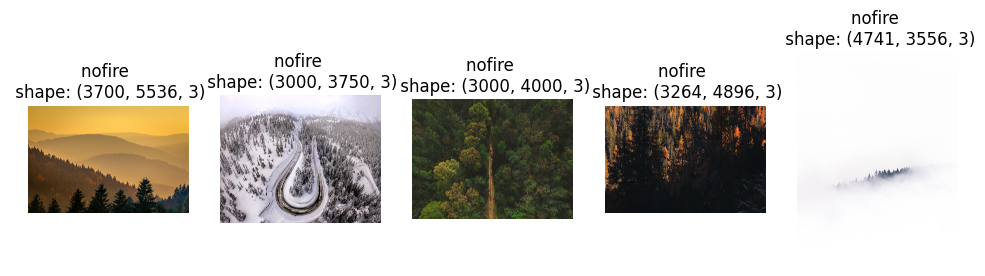

In [10]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)
  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

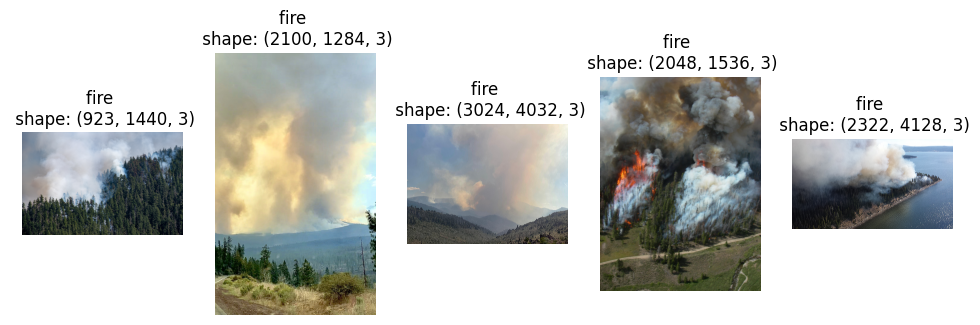

In [11]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [12]:
img_width, img_height = 150, 150
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [13]:
class_mapping = train_generator.class_indices
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [14]:
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
39/58 ━━━━━━━━━━━━━━━━━━━━ 2:16 7s/step - accuracy: 0.6035 - loss: 0.7811

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


43/58 ━━━━━━━━━━━━━━━━━━━━ 1:48 7s/step - accuracy: 0.6081 - loss: 0.7688

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 531s 9s/step - accuracy: 0.6240 - loss: 0.7322 - val_accuracy: 0.7396 - val_loss: 0.5092
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5312 - loss: 0.6220

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5312 - loss: 0.6220 - val_accuracy: 0.7396 - val_loss: 0.4989
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 503s 8s/step - accuracy: 0.7669 - loss: 0.4975 - val_accuracy: 0.7760 - val_loss: 0.4720
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7500 - loss: 0.5437 - val_accuracy: 0.7448 - val_loss: 0.4554
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 531s 8s/step - accuracy: 0.7648 - loss: 0.4739 - val_accuracy: 0.7812 - val_loss: 0.4448
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9375 - loss: 0.2653 - val_accuracy: 0.7969 - val_loss: 0.4258
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 508s 9s/step - accuracy: 0.7855 - loss: 0.4318 - val_accuracy: 0.7969 - val_loss: 0.4373
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8125 - loss: 0.5071 - val_accuracy: 0.7865 - val_loss: 0.4436
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 509s 8s/step - accuracy: 0.8211 - loss: 0.4084 - val_accuracy: 0.8099 - val_loss: 0.409

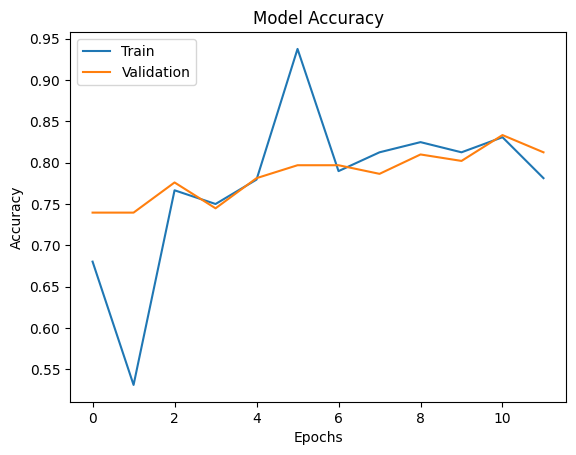

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

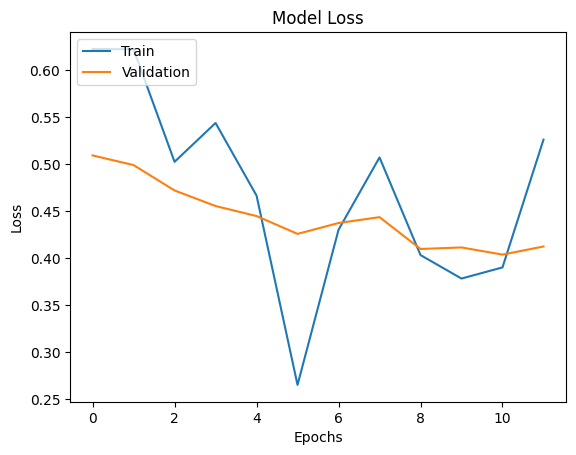

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples//batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 8/12 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accuracy: 0.8211 - loss: 0.3940

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - accuracy: 0.8230 - loss: 0.3841
Test Accuracy: 0.8307


In [16]:
model.save('FFD.keras')

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('FFD.keras')
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [18]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire')

['29071683967_b1ed99cb89_o.jpg',
 '9570772331_0822c9b670_o.jpg',
 'malachi-brooks-lhZ61YqYhnA-unsplash.jpg',
 '28537699003_1a422593ca_o.jpg',
 '51404893429_95e004cb03_o.jpg',
 '26131736898_9e6a8cd68f_o.jpg',
 '50622961901_b344261876_o.jpg',
 '35410741240_4dde737981_o.jpg',
 '20960888741_8c4be2c1df_o.jpg',
 '52230132421_efbcf13fe2_o.png',
 '52291063924_0a29bb857f_o.jpg',
 '9600858470_9d349a2271_o.jpg',
 '52390706166_2ef8a61765_o.jpg',
 '37342470222_39ab7a0005_o.jpg',
 '19196558588_267f24b847_o.jpg',
 '50622019883_c988dcf6ba_o.jpg',
 '33116128054_0169df2131_o.jpg',
 '32923781413_197187fc02_o.jpg',
 '50380847162_24a484981b_o.jpg',
 '52561565423_bbc7b2daf8_o.jpg',
 '27389369514_cd30397ac2_o.jpg',
 '51339519791_6c87189d8b_o.jpg',
 '26549039025_b4cce14ec7_o.jpg',
 '51840740529_300582b71b_o.jpg',
 '36171933842_96ffbd3205_o.jpg',
 '51236039150_95c87d9260_o.jpg',
 '8469662828_371dbcb70d_o.jpg',
 '52871185823_2561dcb25a_o.jpg',
 '28347651877_ce21ed134e_o.png',
 '35436611810_9b938fc10c_o.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


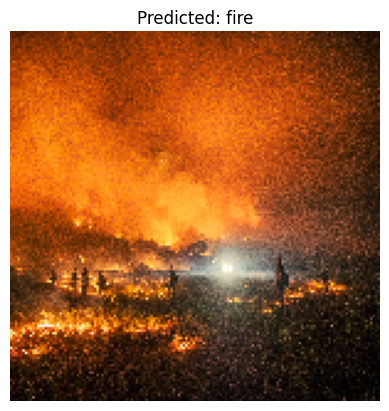

In [ ]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/50321143652_b8f0cefa95_o.jpg')